In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
co2 = pd.read_csv("co2.csv", sep = '\t')
co2.head()

,data,media
0,1980.042,338.45
1,1980.125,339.15
2,1980.208,339.48
3,1980.292,339.87
4,1980.375,340.30


<module 'matplotlib.pyplot' from '/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/pyplot.py'>

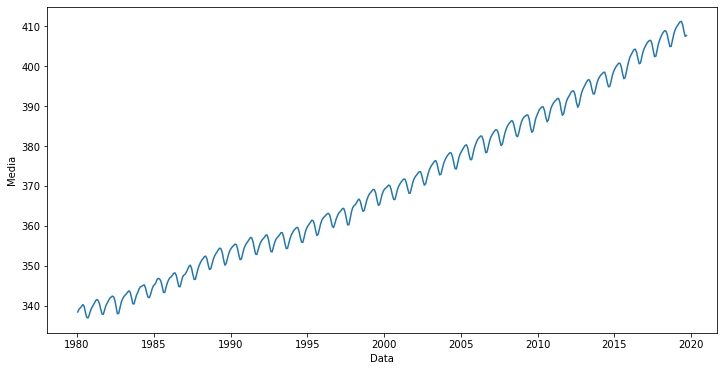

In [3]:
plt.figure(figsize=(12,6))
plt.plot(co2['data'], co2['media'])
plt.ylabel('Media')
plt.xlabel('Data')
plt

In [4]:
nasc = pd.read_csv('nascimentos.csv')
nasc.head()

,data,n_nasc
0,1959-01-01,35
1,1959-01-02,32
2,1959-01-03,30
3,1959-01-04,31
4,1959-01-05,44


In [5]:
nasc['data'] = pd.to_datetime(nasc['data'])

<module 'matplotlib.pyplot' from '/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/pyplot.py'>

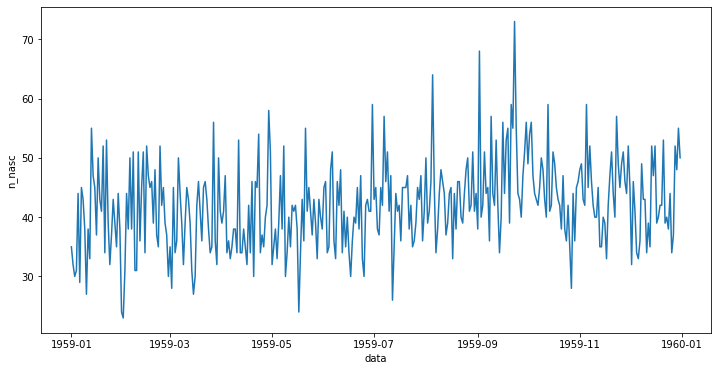

In [6]:
plt.figure(figsize=(12,6))
plt.plot(nasc['data'], nasc['n_nasc'])
plt.ylabel('n_nasc')
plt.xlabel('data')
plt

In [7]:
media_carb = co2['media'].mean()
media_carb

370.10314465408806

In [8]:
dt_carb = co2['data'][1] - co2['data'][0]
dt_carb

0.0829999999998563

<module 'matplotlib.pyplot' from '/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/pyplot.py'>

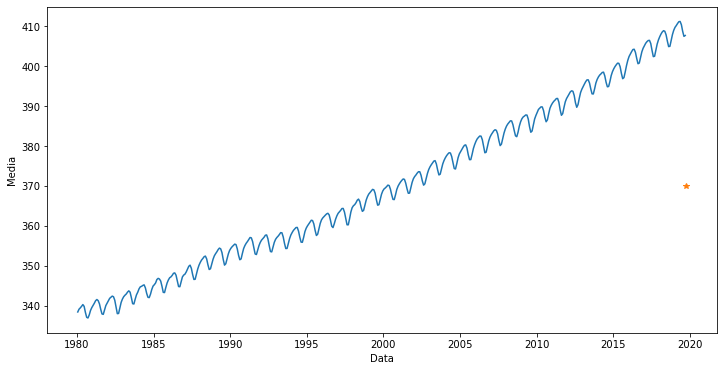

In [9]:
plt.figure(figsize=(12,6))
plt.plot(co2['data'], co2['media'])
plt.plot(co2.iloc[-1, 0] + dt_carb, media_carb, "*")
plt.ylabel('Media')
plt.xlabel('Data')
plt

In [10]:
media_nasc = nasc['n_nasc'].mean()
media_nasc

41.98082191780822

In [11]:
dt_nasc = nasc['data'][1] - nasc['data'][0]
dt_nasc

Timedelta('1 days 00:00:00')

<module 'matplotlib.pyplot' from '/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/pyplot.py'>

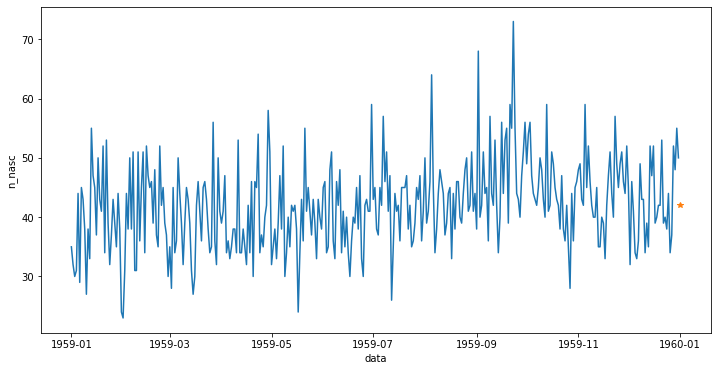

In [12]:
plt.figure(figsize=(12,6))
plt.plot(nasc['data'], nasc['n_nasc'])
plt.plot(nasc.iloc[-1, 0] + dt_nasc, media_nasc, "*")
plt.ylabel('n_nasc')
plt.xlabel('data')
plt

In [13]:
media_tres_pontos_co2 = co2['media'].tail(3).mean()
media_tres_pontos_co2

407.92333333333335

<module 'matplotlib.pyplot' from '/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/pyplot.py'>

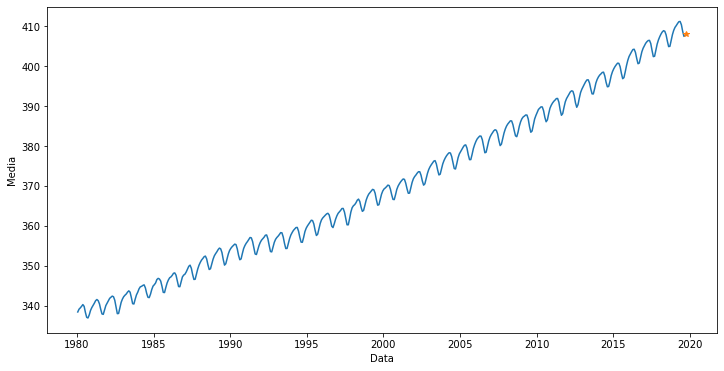

In [14]:
plt.figure(figsize=(12,6))
plt.plot(co2['data'], co2['media'])
plt.plot(co2.iloc[-1, 0] + dt_carb, media_tres_pontos_co2, "*")
plt.ylabel('Media')
plt.xlabel('Data')
plt

In [15]:
media_tres_pontos_nasc = nasc['n_nasc'].tail(3).mean()
media_tres_pontos_nasc

51.0

<module 'matplotlib.pyplot' from '/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/pyplot.py'>

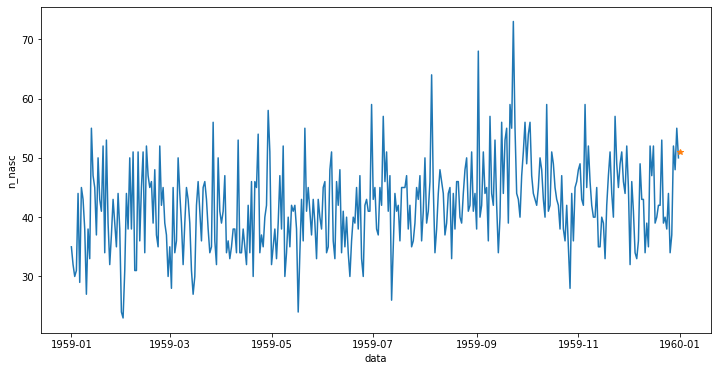

In [16]:
plt.figure(figsize=(12,6))
plt.plot(nasc['data'], nasc['n_nasc'])
plt.plot(nasc.iloc[-1, 0] + dt_nasc, media_tres_pontos_nasc, "*")
plt.ylabel('n_nasc')
plt.xlabel('data')
plt

In [17]:
media_movel_co2 =  co2.rolling(5).mean()

<module 'matplotlib.pyplot' from '/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/pyplot.py'>

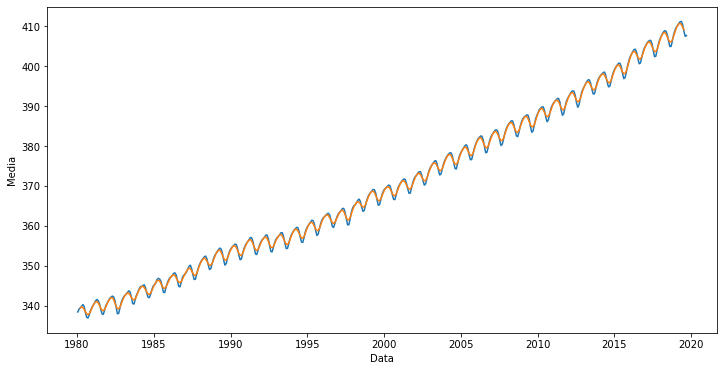

In [18]:
plt.figure(figsize=(12,6))
plt.plot(co2['data'], co2['media'])
plt.plot(media_movel_co2['data'], media_movel_co2['media'])
plt.ylabel('Media')
plt.xlabel('Data')
plt

In [19]:
media_movel_nasc = nasc.rolling(5).mean()

<module 'matplotlib.pyplot' from '/home/edcarlos/anaconda3/envs/data_science/lib/python3.6/site-packages/matplotlib/pyplot.py'>

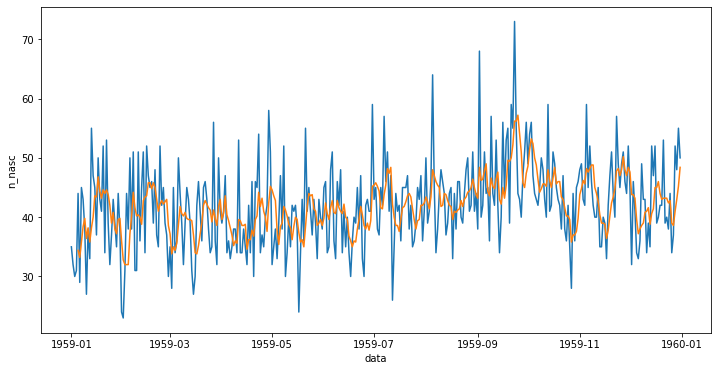

In [20]:
plt.figure(figsize=(12,6))
plt.plot(nasc['data'], nasc['n_nasc'])
plt.plot(nasc['data'], media_movel_nasc['n_nasc'])
plt.ylabel('n_nasc')
plt.xlabel('data')
plt

In [21]:
result_co2 = seasonal_decompose(co2.set_index('data'), period = 35)

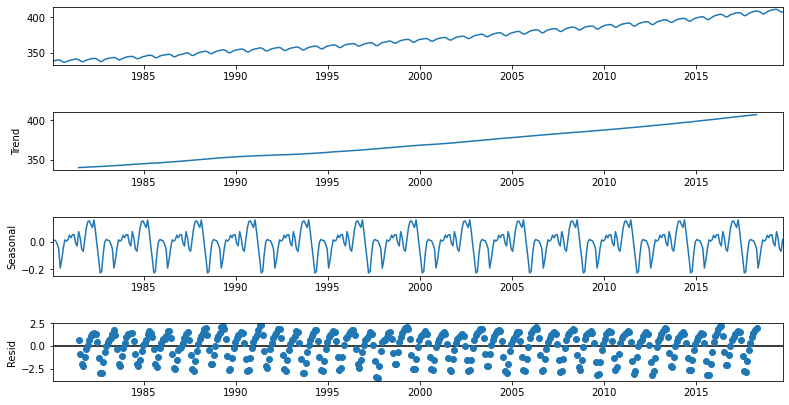

In [22]:
ax = result_co2.plot();
ax.set_size_inches(12,6)

In [23]:
result_nasc = seasonal_decompose(nasc.set_index('data'), period = 35)

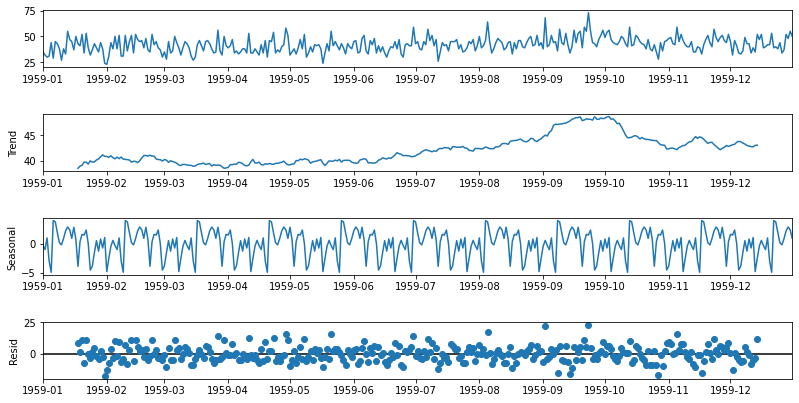

In [24]:
ax = result_nasc.plot();
ax.set_size_inches(12,6)

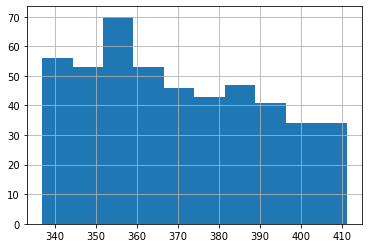

In [25]:
ax = co2['media'].hist()

In [26]:
divide = int(len(co2)/2)
x = co2['media'].values

In [27]:
c1, c2 = x[0:divide], x[divide:]

In [28]:
c1.mean()

352.31550420168065

In [29]:
c2.mean()

387.816359832636

In [30]:
c1.var()

73.90219533401597

In [31]:
c2.var()

151.542490933282

In [32]:
divide = int(len(nasc)/2)

In [33]:
x = nasc['n_nasc'].values

In [34]:
n1, n2 = x[0:divide], x[divide:]

In [35]:
n1.mean()

39.76373626373626

In [36]:
n2.mean()

44.185792349726775

In [37]:
n1.var()

49.21341021615746

In [38]:
n2.var()

48.708650601690096

In [39]:
resultado_co2 = adfuller(co2['media'].values)

In [40]:
print(f'Estatística ADF {resultado_co2[0]}')
print(f'p-valor {resultado_co2[1]}')

Estatística ADF 3.036828829166984
p-valor 1.0


In [41]:
resultado_nasc = adfuller(nasc['n_nasc'].values)

In [42]:
print(f'Estatística ADF {resultado_nasc[0]}')
print(f'p-valor {resultado_nasc[1]}')

Estatística ADF -4.808291253559764
p-valor 5.2434129901498554e-05
